Применение линейной регрессию на практике – предсказание стоимости машин на основе факторов, от которых зависит ценообразование на автомобили.

In [98]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [5]:
cars = pd.read_csv('https://stepik.org/media/attachments/lesson/387691/cars.csv')

In [16]:
cars['company'] = cars.CarName.str.split(' ').apply(lambda x: x[0])

In [28]:
cars = cars.drop(['CarName', 'car_ID'], axis=1)

In [29]:
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [34]:
cars.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

<AxesSubplot:>

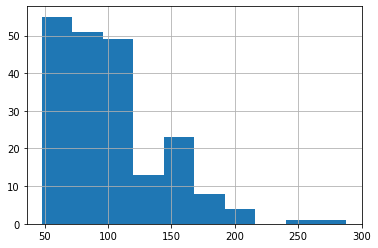

In [116]:
cars.horsepower.hist()

In [40]:
cars.company.str.lower().replace({'porcshce': 'porsche', 'toyouta' : 'toyota', 'vokswagen' : 'volkswagen', 'vw' : 'volkswagen', 'maxda' : 'mazda'}).nunique()

22

In [41]:
cars.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'company'],
      dtype='object')

In [45]:
new_df = cars.drop(['symboling', 'doornumber', 'enginelocation', 'fuelsystem', 'stroke', 'compressionratio', 'carheight', 'peakrpm', 'citympg', 'highwaympg'], axis=1)

In [50]:
np.round(new_df.corr(method='pearson'), 2)

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
wheelbase,1.00,0.87,0.80,0.78,0.57,0.49,0.35,0.58
carlength,0.87,1.00,0.84,0.88,0.68,0.61,0.55,0.68
carwidth,0.80,0.84,1.00,0.87,0.74,0.56,0.64,0.76
curbweight,0.78,0.88,0.87,1.00,0.85,0.65,0.75,0.84
enginesize,0.57,0.68,0.74,0.85,1.00,0.58,0.81,0.87
boreratio,0.49,0.61,0.56,0.65,0.58,1.00,0.57,0.55
horsepower,0.35,0.55,0.64,0.75,0.81,0.57,1.00,0.81
price,0.58,0.68,0.76,0.84,0.87,0.55,0.81,1.00


In [51]:
new_df.dtypes

fueltype           object
aspiration         object
carbody            object
drivewheel         object
wheelbase         float64
carlength         float64
carwidth          float64
curbweight          int64
enginetype         object
cylindernumber     object
enginesize          int64
boreratio         float64
horsepower          int64
price             float64
company            object
dtype: object

In [80]:
new_df.shape

(205, 15)

In [78]:
df_dummy = pd.get_dummies(data = cars[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'company']], drop_first= True)

In [82]:
df_dummy

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,...,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_toyouta,company_vokswagen,company_volkswagen,company_volvo,company_vw
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
201,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
202,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
203,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [75]:
new_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'company'], axis=1)

In [70]:
df.shape

(205, 8)

In [76]:
data_frame = pd.concat([df_dummy, new_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'company'], axis=1)], axis=1)

In [77]:
data_frame.shape

(205, 55)

In [88]:
model = smf.ols('price ~ horsepower', data=data_frame).fit()

In [92]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           1.48e-48
Time:                        13:23:31   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.0

In [95]:
np.round(0.653 * 100, 0)

65.0

In [99]:
data_frame.columns

Index(['fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'company_alfa-romero', 'company_audi', 'company_bmw', 'company_buick',
       'company_chevrolet', 'company_dodge', 'company_honda', 'company_isuzu',
       'company_jaguar', 'company_maxda', 'company_mazda', 'company_mercury',
       'company_mitsubishi', 'company_nissan', 'company_peugeot',
       'company_plymouth', 'company_porcshce', 'company_porsche',
       'company_renault', 'company_saab', 'company_subaru', 'company_toyota',
       'company_toyouta', 'company_vokswagen', 'company_volkswagen',
       'company_volvo', 'company_vw', 'wheelbas

In [100]:
X = data_frame.drop('price', axis=1)

In [101]:
X.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,...,company_volkswagen,company_volvo,company_vw,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,88.6,168.8,64.1,2548,130,3.47,111
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,88.6,168.8,64.1,2548,130,3.47,111
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,94.5,171.2,65.5,2823,152,2.68,154
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,99.8,176.6,66.2,2337,109,3.19,102
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,99.4,176.6,66.4,2824,136,3.19,115


In [102]:
Y = data_frame['price']

In [103]:
X = sm.add_constant(X)

In [104]:
model = sm.OLS(Y,X)
results = model.fit()

In [106]:
print(results.summary()) # all predictors 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     70.67
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           3.98e-84
Time:                        13:33:39   Log-Likelihood:                -1801.8
No. Observations:                 205   AIC:                             3710.
Df Residuals:                     152   BIC:                             3886.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.729e+

In [109]:
X_wo = data_frame.drop(['price', 'company_alfa-romero', 'company_audi', 'company_bmw', 'company_buick',
       'company_chevrolet', 'company_dodge', 'company_honda', 'company_isuzu',
       'company_jaguar', 'company_maxda', 'company_mazda', 'company_mercury',
       'company_mitsubishi', 'company_nissan', 'company_peugeot',
       'company_plymouth', 'company_porcshce', 'company_porsche',
       'company_renault', 'company_saab', 'company_subaru', 'company_toyota',
       'company_toyouta', 'company_vokswagen', 'company_volkswagen',
       'company_volvo', 'company_vw'], axis=1)

In [110]:
Y_wo = data_frame['price']

In [112]:
X_wo = sm.add_constant(X_wo)

In [113]:
model = sm.OLS(Y_wo, X_wo)

In [114]:
result = model.fit()

In [115]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     72.32
Date:                Tue, 01 Jun 2021   Prob (F-statistic):           9.86e-81
Time:                        13:42:05   Log-Likelihood:                -1881.6
No. Observations:                 205   AIC:                             3817.
Df Residuals:                     178   BIC:                             3907.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -1.7e+